# import  및 encoding

In [1]:
# # 한글깨짐 현상 -> 파일 열자마자 설치하고 주석처리 한 다음에 런타임 다시 돌리기 !
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# 파일 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/세종시/data/5.세종시_단독다가구(매매)_실거래가.csv')
df.head()

,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일
0,201701,2,세종특별자치시 전의면 다방리,단독,8m미만,67.32,294.0,"2,000",1991.0,NaN
1,201701,4,세종특별자치시 조치원읍 서창리,단독,8m미만,581.25,415.0,"54,500",1997.0,NaN
2,201701,4,세종특별자치시 조치원읍 죽림리,단독,8m미만,63.89,175.0,"16,000",1983.0,NaN
3,201701,6,세종특별자치시 금남면 용담리,단독,8m미만,95.76,537.0,"26,000",1977.0,NaN
4,201701,6,세종특별자치시 조치원읍 서창리,다가구,8m미만,375.36,222.7,"53,700",2011.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      1144 non-null   int64  
 1   계약일       1144 non-null   int64  
 2   시군구       1144 non-null   object 
 3   주택유형      1144 non-null   object 
 4   도로조건      1144 non-null   object 
 5   연면적(㎡)    1144 non-null   float64
 6   대지면적(㎡)   1144 non-null   float64
 7   거래금액(만원)  1144 non-null   object 
 8   건축년도      1135 non-null   float64
 9   해제사유발생일   41 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 89.5+ KB


# 거래금액(object) -> int 형으로 변환

In [5]:
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',', '').astype('int64')
df.head()

,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일
0,201701,2,세종특별자치시 전의면 다방리,단독,8m미만,67.32,294.0,2000,1991.0,NaN
1,201701,4,세종특별자치시 조치원읍 서창리,단독,8m미만,581.25,415.0,54500,1997.0,NaN
2,201701,4,세종특별자치시 조치원읍 죽림리,단독,8m미만,63.89,175.0,16000,1983.0,NaN
3,201701,6,세종특별자치시 금남면 용담리,단독,8m미만,95.76,537.0,26000,1977.0,NaN
4,201701,6,세종특별자치시 조치원읍 서창리,다가구,8m미만,375.36,222.7,53700,2011.0,NaN


# '동네' 컬럼 추가

In [6]:
df['동네'] = df.시군구.str.split(' ').str[1]
df.head()

,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일,동네
0,201701,2,세종특별자치시 전의면 다방리,단독,8m미만,67.32,294.0,2000,1991.0,NaN,전의면
1,201701,4,세종특별자치시 조치원읍 서창리,단독,8m미만,581.25,415.0,54500,1997.0,NaN,조치원읍
2,201701,4,세종특별자치시 조치원읍 죽림리,단독,8m미만,63.89,175.0,16000,1983.0,NaN,조치원읍
3,201701,6,세종특별자치시 금남면 용담리,단독,8m미만,95.76,537.0,26000,1977.0,NaN,금남면
4,201701,6,세종특별자치시 조치원읍 서창리,다가구,8m미만,375.36,222.7,53700,2011.0,NaN,조치원읍


# '도로조건' 컬럼 '-' 기호 삭제

In [7]:
df['도로조건'].unique()

array(['8m미만', '25m미만', '12m미만', '-', '25m이상'], dtype=object)

In [8]:
df['도로조건'] = df['도로조건'].str.replace('-', '0')
df['도로조건'].unique()

array(['8m미만', '25m미만', '12m미만', '0', '25m이상'], dtype=object)

# 불필요한 컬럼 삭제
- 가격에 영향을 주지 않는 컬럼 삭제

In [9]:
df2 = df.drop(['계약년월', '계약일','시군구','해제사유발생일'],axis=1)
df2

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,동네
0,단독,8m미만,67.32,294.0,2000,1991.0,전의면
1,단독,8m미만,581.25,415.0,54500,1997.0,조치원읍
2,단독,8m미만,63.89,175.0,16000,1983.0,조치원읍
3,단독,8m미만,95.76,537.0,26000,1977.0,금남면
4,다가구,8m미만,375.36,222.7,53700,2011.0,조치원읍
...,...,...,...,...,...,...,...
1139,단독,8m미만,191.34,660.0,16000,1998.0,전동면
1140,단독,8m미만,235.71,950.0,47100,1990.0,장군면
1141,단독,8m미만,129.96,1482.0,35000,2014.0,전동면
1142,단독,8m미만,205.05,142.8,30000,1977.0,조치원읍


In [10]:
df2['주택유형'].unique()

array(['단독', '다가구'], dtype=object)

#One hot Encoding

In [11]:
# 동네
df_oh1 = pd.get_dummies(df2['동네'])
df_oh1.head()

,고운동,금남면,도담동,부강면,새롬동,소정면,아름동,연기면,연동면,연서면,장군면,전동면,전의면,조치원읍,한솔동
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
# 도로조건
df_oh2 = pd.get_dummies(df2['도로조건'])
df_oh2.head()

,0,12m미만,25m미만,25m이상,8m미만
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [13]:
# 주택유형
df_oh3 = pd.get_dummies(df2['주택유형'])
df_oh3.head()

,다가구,단독
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [14]:
df3 = pd.concat([df2,df_oh1,df_oh2,df_oh3],axis=1)
df3

,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,동네,고운동,금남면,도담동,부강면,새롬동,소정면,아름동,연기면,연동면,연서면,장군면,전동면,전의면,조치원읍,한솔동,0,12m미만,25m미만,25m이상,8m미만,다가구,단독
0,단독,8m미만,67.32,294.0,2000,1991.0,전의면,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,단독,8m미만,581.25,415.0,54500,1997.0,조치원읍,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,단독,8m미만,63.89,175.0,16000,1983.0,조치원읍,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,단독,8m미만,95.76,537.0,26000,1977.0,금남면,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,다가구,8m미만,375.36,222.7,53700,2011.0,조치원읍,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,단독,8m미만,191.34,660.0,16000,1998.0,전동면,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1140,단독,8m미만,235.71,950.0,47100,1990.0,장군면,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1141,단독,8m미만,129.96,1482.0,35000,2014.0,전동면,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1142,단독,8m미만,205.05,142.8,30000,1977.0,조치원읍,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [15]:
# 원핫인코딩 된 컬럼들 삭제

df3 = df3.drop(['주택유형','도로조건','동네'], axis=1)
df3.head()

,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,고운동,금남면,도담동,부강면,새롬동,소정면,아름동,연기면,연동면,연서면,장군면,전동면,전의면,조치원읍,한솔동,0,12m미만,25m미만,25m이상,8m미만,다가구,단독
0,67.32,294.0,2000,1991.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,581.25,415.0,54500,1997.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,63.89,175.0,16000,1983.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,95.76,537.0,26000,1977.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,375.36,222.7,53700,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


# 상관관계 heatmap

In [16]:
df3.columns

Index(['연면적(㎡)', '대지면적(㎡)', '거래금액(만원)', '건축년도', '고운동', '금남면', '도담동', '부강면',
       '새롬동', '소정면', '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍',
       '한솔동', '0', '12m미만', '25m미만', '25m이상', '8m미만', '다가구', '단독'],
      dtype='object')

In [20]:
# 히트맵 시각화를 위해 거래금액 컬럼을 가장 나중으로 변경하는 작업

df3=df3[['연면적(㎡)', '대지면적(㎡)', '건축년도', '고운동', '금남면', '도담동', '부강면',
       '새롬동', '소정면', '아름동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍',
       '한솔동', '0', '12m미만', '25m미만', '25m이상', '8m미만', '다가구', '단독','거래금액(만원)']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


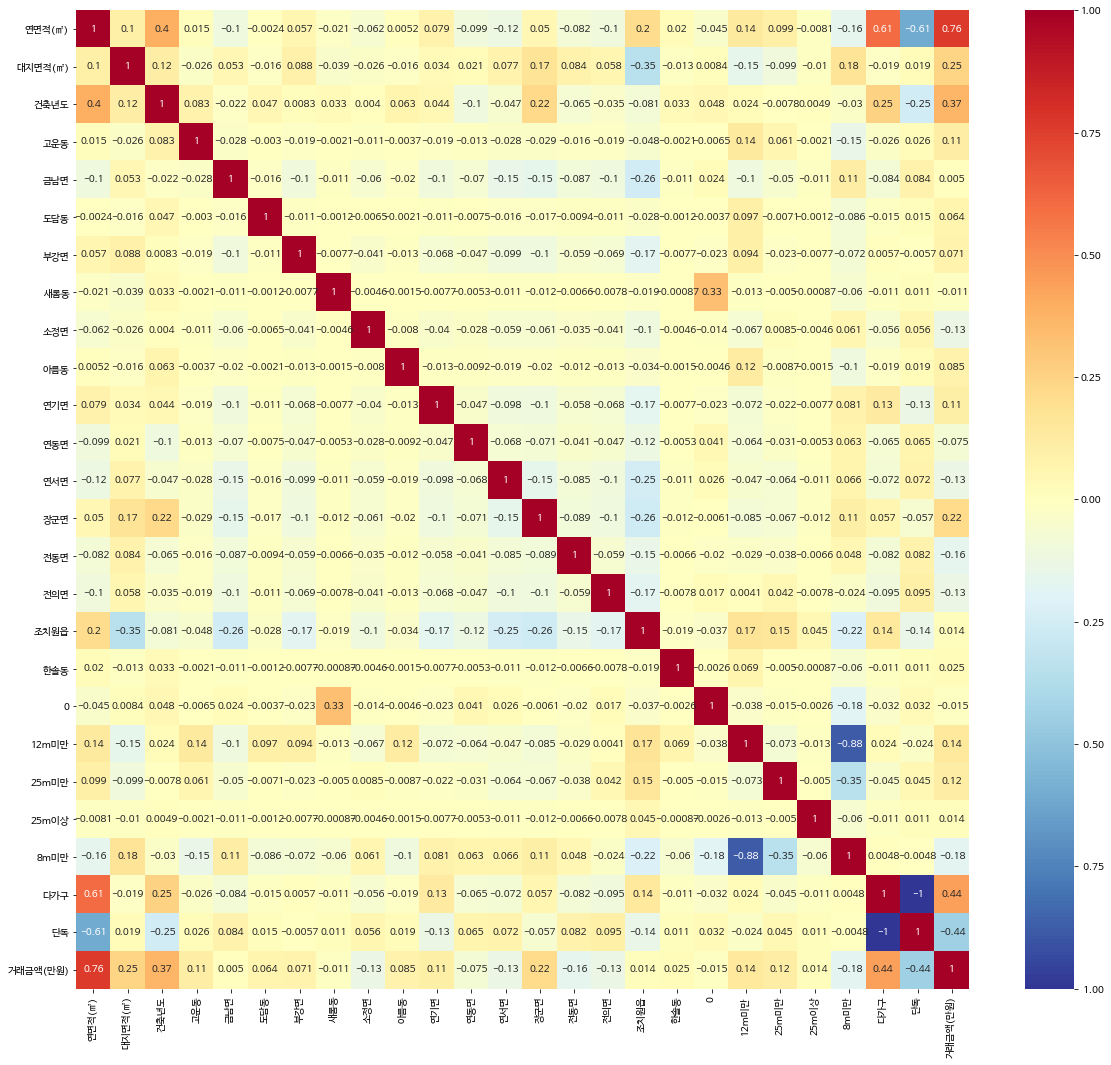

In [21]:
plt.figure(figsize=(20,18))
sns.heatmap(df3.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()

# 가격에 영향을 적게 주는 컬럼 삭제

In [ ]:
# '금남면', '도담동', '부강면', '새롬동', '아름동', '연동면', '조치원읍', '한솔동', '0', 

In [22]:
df4 = df3.drop(['금남면', '도담동', '부강면', '새롬동', '아름동', '연동면', '조치원읍', '한솔동', '0'], axis=1)
df4.head()

,연면적(㎡),대지면적(㎡),건축년도,고운동,소정면,연기면,연서면,장군면,전동면,전의면,12m미만,25m미만,25m이상,8m미만,다가구,단독,거래금액(만원)
0,67.32,294.0,1991.0,0,0,0,0,0,0,1,0,0,0,1,0,1,2000
1,581.25,415.0,1997.0,0,0,0,0,0,0,0,0,0,0,1,0,1,54500
2,63.89,175.0,1983.0,0,0,0,0,0,0,0,0,0,0,1,0,1,16000
3,95.76,537.0,1977.0,0,0,0,0,0,0,0,0,0,0,1,0,1,26000
4,375.36,222.7,2011.0,0,0,0,0,0,0,0,0,0,0,1,1,0,53700


# 최종 heatmap

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


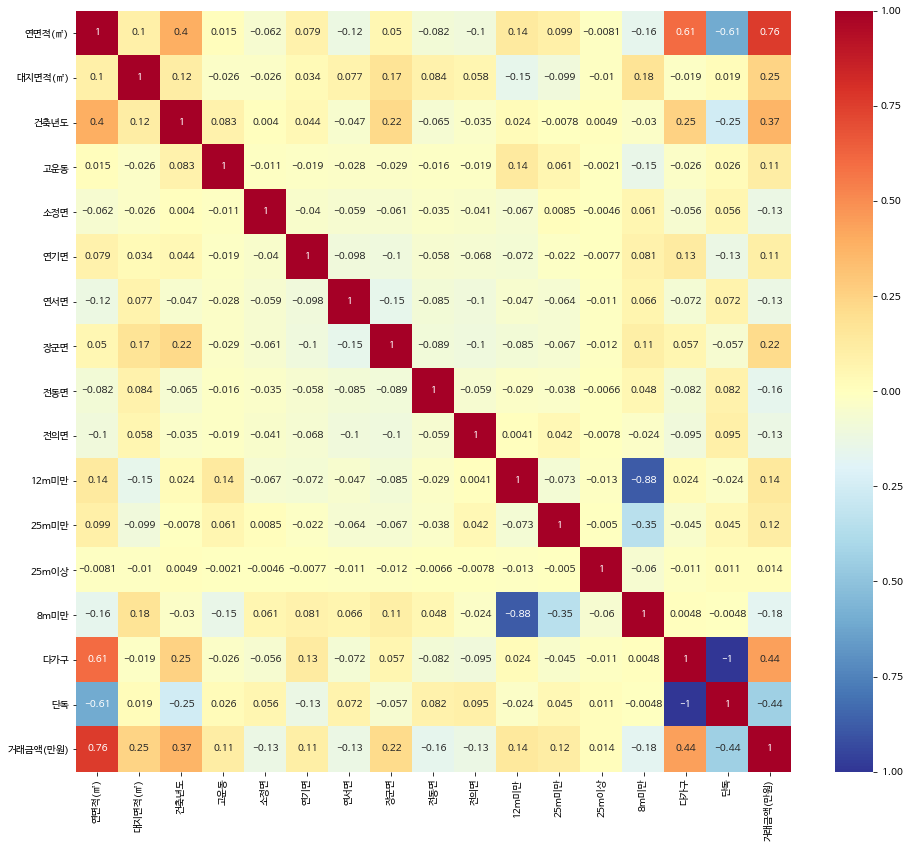

In [23]:
plt.figure(figsize=(16,14))
sns.heatmap(df4.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()